In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("D:\DOwn\MaunaLoaDailyTemps _1_ _2_.csv")

In [3]:
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [4]:
data.shape

(1825, 6)

In [5]:
data["DATE"]=pd.to_datetime(data["DATE"])

In [6]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


In [7]:
data["Sunset"]=pd.to_datetime(data["Sunset"],format="%H%M")

In [8]:
data["Sunrise"]=pd.to_datetime(data["Sunrise"],format="%H%M")

In [9]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,1900-01-01 06:57:00,1900-01-01 17:56:00
1,2014-01-02,35.0,50.0,43.0,1900-01-01 06:57:00,1900-01-01 17:56:00
2,2014-01-03,36.0,45.0,41.0,1900-01-01 06:57:00,1900-01-01 17:57:00
3,2014-01-04,32.0,41.0,37.0,1900-01-01 06:58:00,1900-01-01 17:57:00
4,2014-01-05,24.0,38.0,31.0,1900-01-01 06:58:00,1900-01-01 17:58:00


In [10]:
data["Sunset"]=data["Sunset"].dt.time

In [11]:
data["Sunrise"]=data["Sunrise"].dt.time

In [12]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
1,2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2,2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
3,2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
4,2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


In [13]:
data.index=data["DATE"]

In [14]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,,
2014-01-01,2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
2014-01-02,2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2014-01-03,2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
2014-01-04,2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
2014-01-05,2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


In [15]:
data=data.drop("DATE",axis=1)

In [16]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


<AxesSubplot:xlabel='DATE'>

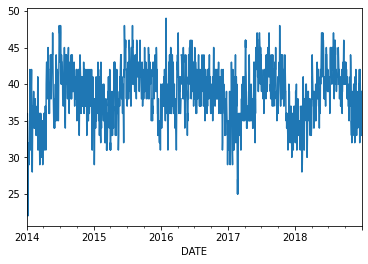

In [17]:
data["MinTemp"].plot()

<AxesSubplot:xlabel='DATE'>

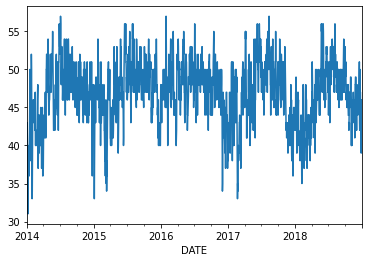

In [18]:
data["AvgTemp"].plot()

<AxesSubplot:xlabel='DATE'>

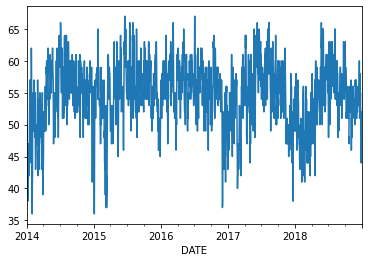

In [19]:
data["MaxTemp"].plot()

In [20]:
data["AvgTemp"].fillna(data["AvgTemp"].mean(),inplace=True)

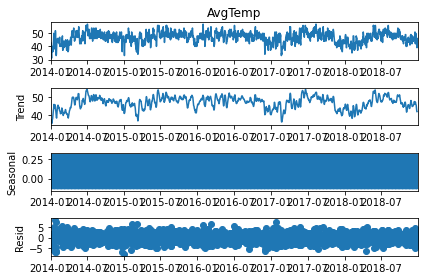

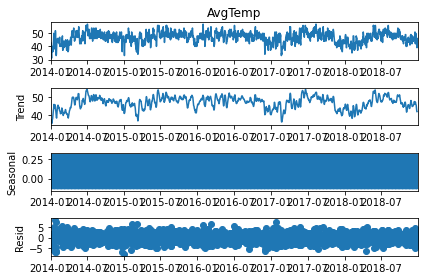

In [21]:
#seasonal Decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(data["AvgTemp"].dropna())

decompose_result.plot()

In [22]:
data.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [23]:
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(data["AvgTemp"].dropna())
print(result)

(-6.594563113389805, 6.977825912591406e-09, 12, 1812, {'1%': -3.4339640110318004, '5%': -2.8631363845692475, '10%': -2.567619862152732}, 8176.215795705775)


In [24]:
#that means data is stationary   as p value=8.6757

In [25]:
data[data["AvgTemp"]>50].shape

(331, 5)

In [26]:
data["AvgTemp"].max()

57.0

In [27]:
data[data["AvgTemp"]==data["AvgTemp"].max()]              

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-07-03,48.0,66.0,57.0,05:48:00,19:05:00
2016-01-29,49.0,64.0,57.0,06:58:00,18:13:00
2017-08-12,47.0,66.0,57.0,06:02:00,18:52:00


In [28]:
data[data["MaxTemp"]==data["MaxTemp"].max()]

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2015-06-18,45.0,67.0,56.0,05:44:00,19:03:00
2016-07-03,45.0,67.0,56.0,05:48:00,19:05:00


In [29]:
data.corr()

,MinTemp,MaxTemp,AvgTemp
MinTemp,1.000000,0.756071,0.917456
MaxTemp,0.756071,1.000000,0.951039
AvgTemp,0.917456,0.951039,1.000000


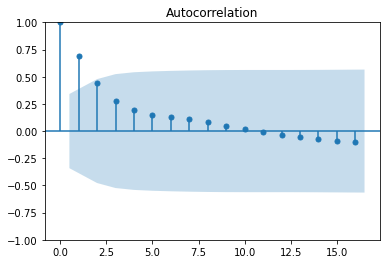

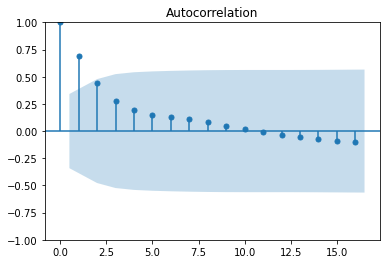

In [30]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


plot_acf(acf(data["AvgTemp"].dropna()))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


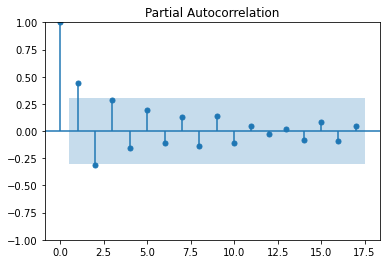

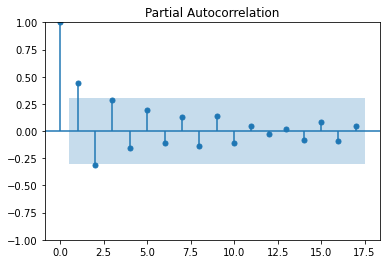

In [31]:
plot_pacf(pacf(data["AvgTemp"].dropna(),method="ols",nlags=40))

7) Which of the Statements is True?
p>0.05, Data is stationary
p<0.05 Data is stationary          #in terems of adfuller
p<0.5 Data is Not Stationary
p>0.5 Data is stationary

In [ ]:
Mean Absolute Error: 3.5168354576333756
Mean Squared Error: 19.23097942057263
Root Mean Squared Error: 4.385314061794507

In [33]:
from statsmodels.tsa.arima.model import ARIMA

train = data.iloc[:1460]["AvgTemp"]
test = data.iloc[1461:]["AvgTemp"]

model = ARIMA(train, order=(3,0,2))
model_fit = model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1460
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -3346.857
Date:                Mon, 20 Mar 2023   AIC                           6707.713
Time:                        21:27:43   BIC                           6744.717
Sample:                    01-01-2014   HQIC                          6721.517
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5735      0.857     53.173      0.000      43.894      47.253
ar.L1          1.9657      0.156     12.570      0.000       1.659       2.272
ar.L2         -1.2564      0.269     -4.666      0.000      -1.784      -0.729
ar.L3          0.2862      0.114      2.502      0.012       0.062       0.510
ma.L1         -1.1112      0.161     -6.903      0.000      -1.427      -0.796
ma.L2          0.1752      0.156      1.121      0.262      -0.131       0.482
sigma2         5.7369      0.201     28.612      0.000       5.344       6.130
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                14.36
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.15
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.arima.model import ARIMA

train = data.iloc[:1460]["AvgTemp"]
test = data.iloc[1461:]["AvgTemp"]

model = ARIMA(train, order=(2,0,0))
model_fit = model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1460
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3371.068
Date:                Mon, 20 Mar 2023   AIC                           6750.136
Time:                        21:27:43   BIC                           6771.281
Sample:                    01-01-2014   HQIC                          6758.024
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9222      0.307    152.925      0.000      46.321      47.524
ar.L1          0.8793      0.025     35.186      0.000       0.830       0.928
ar.L2         -0.0883      0.025     -3.492      0.000      -0.138      -0.039
sigma2         5.9256      0.193     30.771      0.000       5.548       6.303
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.73
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.23
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
test = data.iloc[1461:]["AvgTemp"]

In [36]:
adfuller(test.dropna())

(-2.182425087431094,
 0.21268585609203372,
 11,
 352,
 {'1%': -3.4490648539347544,
  '5%': -2.8697861692116478,
  '10%': -2.5711631253228306},
 1540.6452821127168)

In [37]:
adfuller(train.dropna())

(-7.80751996766279,
 7.2150172130124134e-12,
 6,
 1453,
 {'1%': -3.434858527373781,
  '5%': -2.8635312133080046,
  '10%': -2.567830105465636},
 6565.715966056731)

In [38]:
adfuller(data["AvgTemp"].dropna())

(-6.594563113389805,
 6.977825912591406e-09,
 12,
 1812,
 {'1%': -3.4339640110318004,
  '5%': -2.8631363845692475,
  '10%': -2.567619862152732},
 8176.215795705775)

In [39]:
data.shape

(1825, 5)

In [40]:
data.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,06:57:00,17:56:00
2014-01-02,35.0,50.0,43.0,06:57:00,17:56:00
2014-01-03,36.0,45.0,41.0,06:57:00,17:57:00
2014-01-04,32.0,41.0,37.0,06:58:00,17:57:00
2014-01-05,24.0,38.0,31.0,06:58:00,17:58:00


In [41]:
from statsmodels.tsa.stattools import kpss

In [42]:
kpss(data["AvgTemp"].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.18157980379353342,
 0.1,
 23,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

<AxesSubplot:>

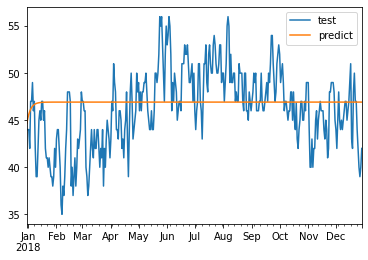

In [44]:
df=pd.DataFrame()
df['predict'] = model_fit.predict(start= len(train),       # takes 2 as q is given  2 so takes before 2 valuese to predict 3rd and so on so it cant start with 0
                                    end=len(train)+len(test)- 1, 
                                    dynamic=True)
df["test"]=test
df[['test','predict']].plot()

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error      # since is the regression problems so we can use Regression metrics
mean_absolute_error(df["test"],df["predict"])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
10) Which conditions need to be satisfied to refer to the time series as stationary.
Autocovariance function depends on s and t only through their difference |s-t| (where t and s are moments in time)
Mean is constant and does not depend on time
The time series under considerations is a finite variance process
None of the above

In [47]:
from statsmodels.tsa.arima.model import ARIMA

train = data.iloc[:1460]["AvgTemp"]
test = data.iloc[1461:]["AvgTemp"]

model = ARIMA(train, order=(0,0,1))
model_fit = model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1460
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3663.137
Date:                Mon, 20 Mar 2023   AIC                           7332.273
Time:                        21:35:13   BIC                           7348.132
Sample:                    01-01-2014   HQIC                          7338.189
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.9422      0.136    345.906      0.000      46.676      47.208
ma.L1          0.6853      0.018     38.800      0.000       0.651       0.720
sigma2         8.8435      0.300     29.454      0.000       8.255       9.432
===================================================================================
Ljung-Box (L1) (Q):                 173.42   Jarque-Bera (JB):                58.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.41
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""